# Import Libs

In [1]:
import numpy as np
import pandas as pd
import spacy
import re
from sklearn import preprocessing,metrics,manifold
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split  
import collections
import matplotlib.patches as mpatches
from sklearn.metrics import accuracy_score
%matplotlib inline
from collections import defaultdict
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,r2_score,recall_score,confusion_matrix,precision_recall_curve
from collections import Counter
from sklearn.model_selection import StratifiedKFold,KFold,StratifiedShuffleSplit
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split 
from nltk.tokenize import word_tokenize
 
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
import string
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
import tokenization
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import bert
import tensorflow_hub as hub
import transformers
from transformers import BertTokenizer,TFBertModel
from scipy import spatial
from keras.preprocessing import sequence, text
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers.recurrent import LSTM, GRU,SimpleRNN
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.embeddings import Embedding
from keras.utils import np_utils
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import transformers
from tokenizers import BertWordPieceTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

# LOADING DATASET FOR Analysis

In [2]:
notedf = pd.read_csv('details.csv')
termdf = pd.read_csv('term.csv')

In [3]:
notedf.shape

(818, 2)

In [4]:
termdf.shape

(566, 2)

In [5]:
def get_word_count(text_list):
    sent_count = 0
    word_count = 0
    vocab = {}
    for text in text_list:
        sentences = sent_tokenize(str(text).lower())
        sent_count = sent_count + len(sentences)
        for sentence in sentences:
            words = word_tokenize(sentence)
            for word in words:
                if(word in vocab.keys()):
                    vocab[word] = vocab[word] + 1
                else:
                    vocab[word] = 1
    word_count = len(vocab.keys())
    return sent_count, word_count

In [7]:
notedf = notedf[notedf['notes'].notna()]
sent_count, word_count = get_word_count(notedf['notes'])
print('No of Sentences in notes column:' + str(sent_count))
print('No of unique words in transcriptions column:' + str(word_count))

No of Sentences in notes column:21727
No of unique words in transcriptions column:20091


In [8]:
data_cat = notedf.groupby(notedf['category'])
i = 1
print("========================Original Categories =====================")
for catName, datacat in data_cat:
    print('Cat' +str(i)+ ' ' + catName + ' : ' + str(len(datacat)))
    i = i + 1
print('=================================================================')

========================Original Categories =====================
Cat1 Cardiovascular / Pulmonary : 371
Cat2 Gastroenterology : 224
Cat3 Neurology : 223


# Preprocessing (Lemmatizing, Tokenzing, Cleaning)

In [4]:
def lemmatize_text(text):
    wordlist=[]
    lemmatizer = WordNetLemmatizer()
    sentences=sent_tokenize(text)
    
    initial_sentences = sentences[0:1]
    final_sentences = sentences[len(sentences)-2: len(sentences)-1]
    
    for sentence in initial_sentences:
        words= word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    for sentence in final_sentences:
        words=word_tokenize(sentence)
        for word in words:
            wordlist.append(lemmatizer.lemmatize(word))
    return ' '.join(wordlist)   

In [5]:
def clean_text(text):
    text  = text.translate(str.maketrans('', '', string.punctuation))
    text1 = ''.join([w for w in text if not w.isdigit()])
    REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;!#$%^&*]')
    
    text2 = text1.lower()
        
    text2 = REPLACE_BY_SPACE_RE.sub('', text2)
    
    lst_text = text2.split() 
    lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
    text3 = " ".join(lst_text)
    
    return text3

In [8]:
lst_stopwords = nltk.corpus.stopwords.words("english")

In [9]:
lst_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
notedf['notes'] = notedf['notes'].apply(lemmatize_text)
notedf.head()

,category,notes
0,Cardiovascular / Pulmonary,"2-D M-MODE : , ,1 . Mild mitral and tricuspid ..."
1,Cardiovascular / Pulmonary,1 . There is a color Doppler suggestive of a p...
2,Cardiovascular / Pulmonary,"2-D ECHOCARDIOGRAM , Multiple view of the hear..."
3,Cardiovascular / Pulmonary,"DESCRIPTION : ,1 . Normal LV systolic function..."
4,Cardiovascular / Pulmonary,"2-D STUDY,1 . Moderate biatrial enlargement.,3 ."


In [11]:

notedf['notes'] = notedf['notes'].apply(clean_text)
notedf.head()

,category,notes
0,Cardiovascular / Pulmonary,mmode mild mitral tricuspid regurgitation
1,Cardiovascular / Pulmonary,color doppler suggestive patent foramen ovale ...
2,Cardiovascular / Pulmonary,echocardiogram multiple view heart great vesse...
3,Cardiovascular / Pulmonary,description normal lv systolic function
4,Cardiovascular / Pulmonary,study moderate biatrial enlargement


In [6]:
notedf['target'] = notedf['category'].replace({'Cardiovascular / Pulmonary': 1, 'Neurology' : 0, 'Gastroenterology' : 2})

In [7]:
notedf.head()

,category,notes,target
0,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit...",1
1,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...,1
2,Cardiovascular / Pulmonary,"2-D ECHOCARDIOGRAM,Multiple views of the heart...",1
3,Cardiovascular / Pulmonary,"DESCRIPTION:,1. Normal cardiac chambers size....",1
4,Cardiovascular / Pulmonary,"2-D STUDY,1. Mild aortic stenosis, widely calc...",1


# Word Cloud Vizualization

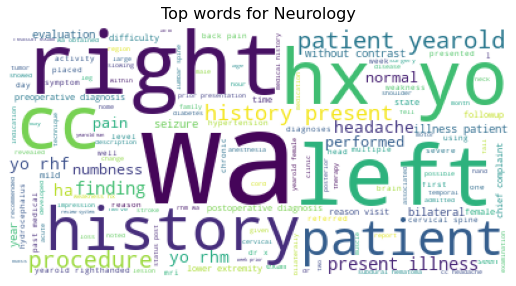

In [65]:
wc = WordCloud(
    background_color='white', 
    max_words=200 
    
)
wc.generate(' '.join(text for text in notedf.loc[notedf['category'] == 'Neurology', 'notes']))
plt.figure(figsize=(9,7))
plt.title('Top words for Neurology', 
          fontdict={'size': 16,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

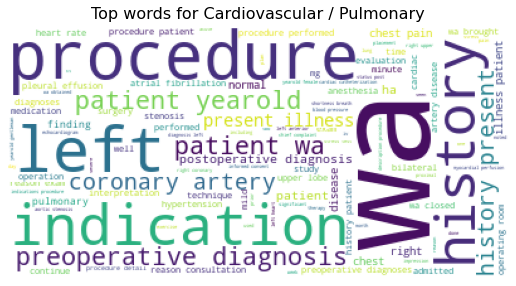

In [66]:
wc = WordCloud(
    background_color='white', 
    max_words=200 
    
)
wc.generate(' '.join(text for text in notedf.loc[notedf['category'] == 'Cardiovascular / Pulmonary', 'notes']))
plt.figure(figsize=(9,7))
plt.title('Top words for Cardiovascular / Pulmonary', 
          fontdict={'size': 16,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

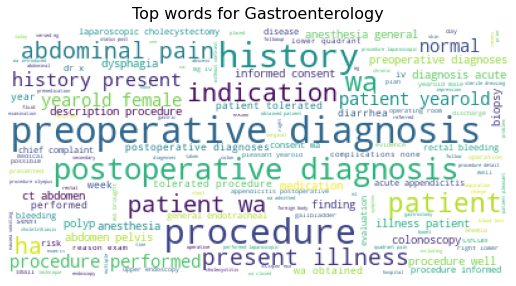

In [68]:
wc = WordCloud(
    background_color='white', 
    max_words=200 
    
)
wc.generate(' '.join(text for text in notedf.loc[notedf['category'] == 'Gastroenterology', 'notes']))
plt.figure(figsize=(9,7))
plt.title('Top words for Gastroenterology', 
          fontdict={'size': 16,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

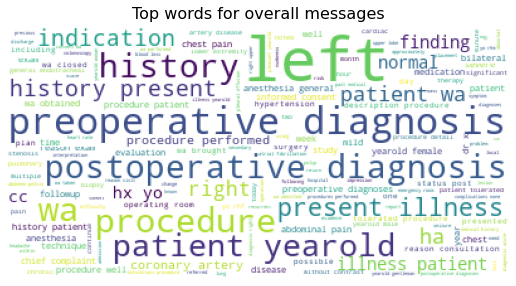

In [69]:
wc = WordCloud(
    background_color='white', 
    max_words=200 
    
)
wc.generate(' '.join(text for text in notedf['notes']))
plt.figure(figsize=(9,7))
plt.title('Top words for overall messages', 
          fontdict={'size': 16,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

In [4]:
def remove_common_words(data):
    data = re.sub("patient", " ", data)
    data = re.sub("left", " ", data)
    data = re.sub("yearold", " ", data)
    data = re.sub("diagnosis", " ", data)
    data = re.sub("procedure", " ", data)
    data = re.sub("history", " ", data)
    data = re.sub("finding", " ", data)
    data = re.sub("female", " ", data)
    data = re.sub("performed", " ", data)
    data = re.sub("right", " ", data)
    data = re.sub("wa", " ", data)
    data = re.sub("cc", " ", data)
    data = re.sub("present", " ", data)
    data = re.sub("male", " ", data)
    return data

In [5]:
notedf['keyword'] = notedf['notes'].apply(lambda z: remove_common_words(z))

In [24]:
notedf['notes']

0      2-D M-MODE: , ,1.  Left atrial enlargement wit...
1      1.  The left ventricular cavity size and wall ...
2      2-D ECHOCARDIOGRAM,Multiple views of the heart...
3      DESCRIPTION:,1.  Normal cardiac chambers size....
4      2-D STUDY,1. Mild aortic stenosis, widely calc...
                             ...                        
813    INDICATION: , Chest pain.,TYPE OF TEST: , Aden...
814    CHIEF COMPLAINT: , Chest pain.,HISTORY OF PRES...
815    HISTORY OF PRESENT ILLNESS: , The patient is a...
816    HISTORY OF PRESENT ILLNESS: , Mr. ABC is a 60-...
817    REASON FOR CONSULTATION:  ,Abnormal echocardio...
Name: notes, Length: 818, dtype: object

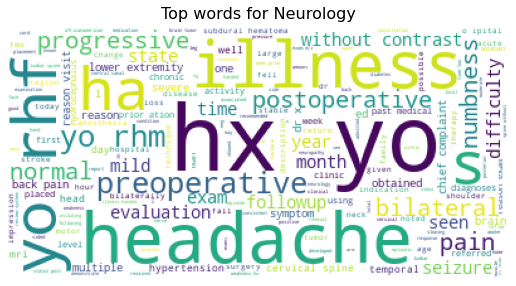

In [28]:
wc = WordCloud(
    background_color='white', 
    max_words=200 
    
)
wc.generate(' '.join(text for text in notedf.loc[notedf['category'] == 'Neurology', 'keyword']))
plt.figure(figsize=(9,7))
plt.title('Top words for Neurology', 
          fontdict={'size': 16,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

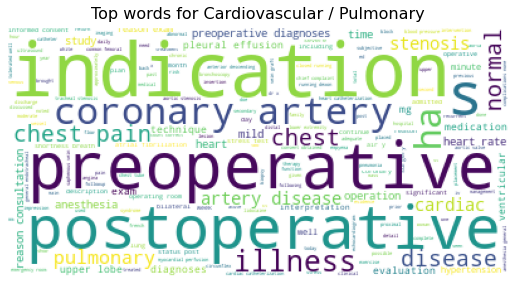

In [29]:
wc = WordCloud(
    background_color='white', 
    max_words=200 
    
)
wc.generate(' '.join(text for text in notedf.loc[notedf['category'] == 'Cardiovascular / Pulmonary', 'keyword']))
plt.figure(figsize=(9,7))
plt.title('Top words for Cardiovascular / Pulmonary', 
          fontdict={'size': 16,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

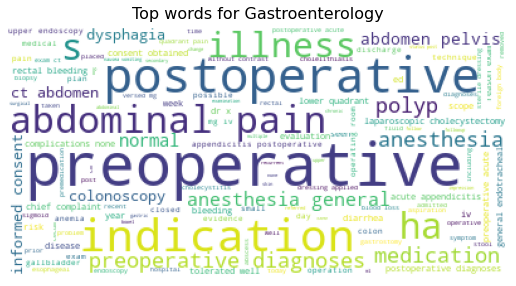

In [30]:
wc = WordCloud(
    background_color='white', 
    max_words=200 
    
)
wc.generate(' '.join(text for text in notedf.loc[notedf['category'] == 'Gastroenterology', 'keyword']))
plt.figure(figsize=(9,7))
plt.title('Top words for Gastroenterology', 
          fontdict={'size': 16,  'verticalalignment': 'bottom'})
plt.imshow(wc)
plt.axis("off")
plt.show()

# TSNE Vizualization - Semantic Embeddings vs Dynamic Embeddings

### 1.TFIDF Vectorization 

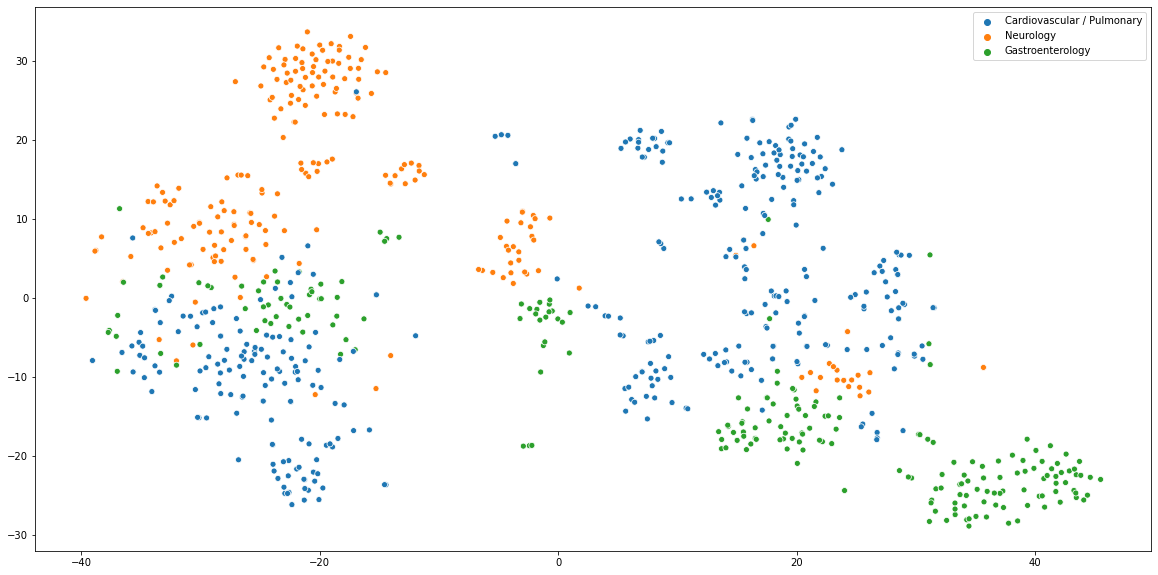

In [46]:
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',ngram_range=(1,3), max_df=0.75,min_df=5, use_idf=True, smooth_idf=True,sublinear_tf=True, max_features=1000)
tfIdfMat  = vectorizer.fit_transform(notedf['notes'].tolist() )
feature_names = sorted(vectorizer.get_feature_names())
tfIdfMatrix = tfIdfMat.todense()
labels = notedf['category'].tolist()
tsne_results = TSNE(n_components=2,init='random',random_state=0, perplexity=40).fit_transform(tfIdfMatrix)
plt.figure(figsize=(20,10))
palette = sns.hls_palette(12, l=.3, s=.9)
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=labels)
plt.show()

In [32]:
nlp1 = spacy.load('en_ner_bc5cdr_md')

In [33]:
nlp = spacy.load('en_ner_bionlp13cg_md')

In [34]:
def process_Text( text):
    wordlist=[]
    doc = nlp(text)
    for ent in doc.ents:
        wordlist.append(ent.text)
    return ' '.join(wordlist)    
def process_Text1( text):
    wordlist=[]
    doc = nlp1(text)
    for ent in doc.ents:
        wordlist.append(ent.text)
    return ' '.join(wordlist)   

In [47]:
notedf['spacy1'] = notedf['notes'].apply(process_Text)

In [48]:
notedf['spacy2'] = notedf['notes'].apply(process_Text1)

### 2. Using en_ner_bionlp13cg_md  SPACY Model

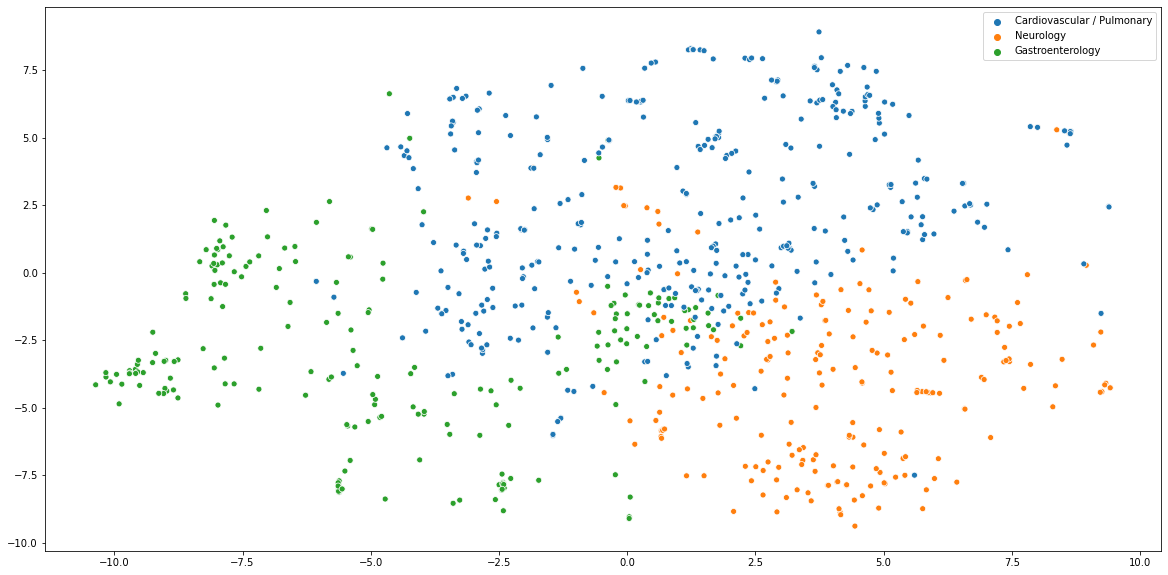

In [49]:
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',ngram_range=(1,3), max_df=0.75,min_df=5, use_idf=True, smooth_idf=True,sublinear_tf=True, max_features=1000)
tfIdfMat  = vectorizer.fit_transform(notedf['spacy1'].tolist() )
feature_names = sorted(vectorizer.get_feature_names())
tfIdfMatrix = tfIdfMat.todense()
labels = notedf['category'].tolist()
tsne_results = TSNE(n_components=2,init='random',random_state=0, perplexity=40).fit_transform(tfIdfMatrix)
plt.figure(figsize=(20,10))
palette = sns.hls_palette(12, l=.3, s=.9)
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=labels)
plt.show()

### 3. Using en_ner_bc5cdr_md  SPACY Model

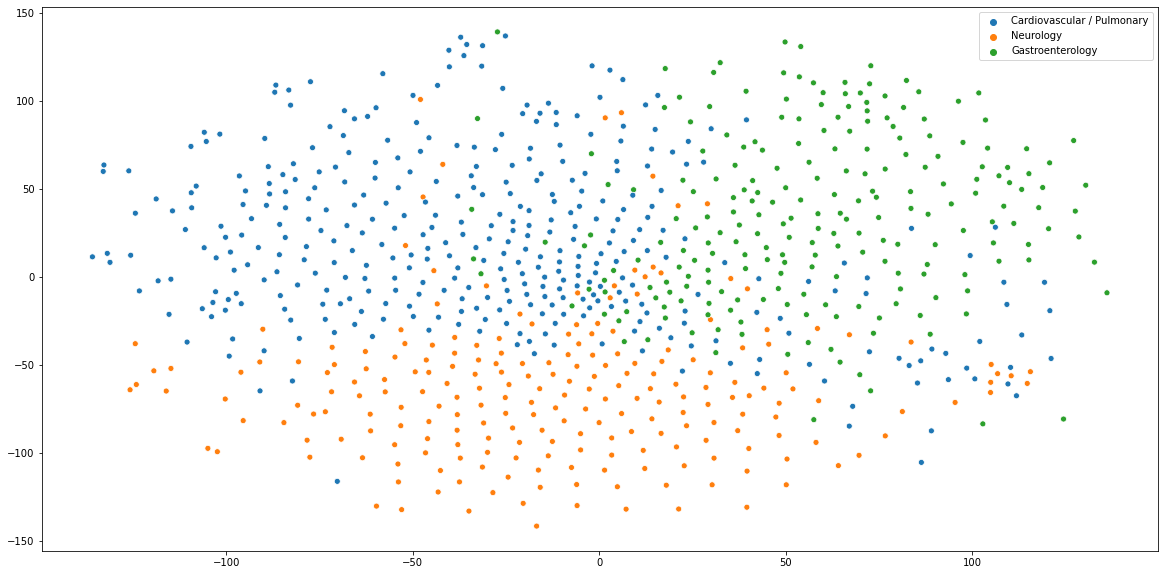

In [50]:
vectorizer = TfidfVectorizer(analyzer='word', stop_words='english',ngram_range=(1,3), max_df=0.75,min_df=5, use_idf=True, smooth_idf=True,sublinear_tf=True, max_features=1000)
tfIdfMat  = vectorizer.fit_transform(notedf['spacy2'].tolist() )
feature_names = sorted(vectorizer.get_feature_names())
tfIdfMatrix = tfIdfMat.todense()
labels = notedf['category'].tolist()
tsne_results = TSNE(n_components=2,init='random',random_state=0, perplexity=40).fit_transform(tfIdfMatrix)
plt.figure(figsize=(20,10))
palette = sns.hls_palette(12, l=.3, s=.9)
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=labels)
plt.show()

## Generating BERT embedding for TNSE Vizualisation, by training our data with bert_en_uncased

In [7]:
def bert_encode(texts, tokenizer, max_len=124):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence)
        tokens += [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

In [8]:
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1"
bert_layer =  hub.KerasLayer(module_url, trainable=True)

INFO:absl:Using C:\Users\sthan\AppData\Local\Temp\tfhub_modules to cache modules.


In [9]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()

In [10]:
tokenizer = transformers.BertTokenizer(vocab_file, do_lower_case=True) 
train_input = bert_encode(notedf['notes'], tokenizer, max_len=62)
train_labels = notedf['target']

In [11]:
def build_model(bert_layer, max_len=62):
    input_word_ids = layers.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = layers.Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = layers.Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    _, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :]

    flatten = layers.Flatten(name='flatten')
    output_flatten = flatten(clf_output)

    out = layers.Dense(len(np.unique(train_labels)), activation='sigmoid')(output_flatten)
    
    model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(Adam(lr=2e-6), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

model1 = build_model(bert_layer, max_len=62)

C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [12]:
 label_dummy = pd.get_dummies(train_labels)

In [17]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 62)]         0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 62)]         0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 62)]         0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]             

In [18]:
train_history = model1.fit(
    train_input, label_dummy,    
    epochs=10,
    batch_size=64
)

Epoch 1/10
13/13 [==============================] - 644s 49s/step - loss: 0.8671 - accuracy: 0.6320
Epoch 2/10
13/13 [==============================] - 593s 45s/step - loss: 0.7732 - accuracy: 0.6822
Epoch 3/10
13/13 [==============================] - 574s 44s/step - loss: 0.6792 - accuracy: 0.7372
Epoch 4/10
13/13 [==============================] - 583s 45s/step - loss: 0.5890 - accuracy: 0.7885
Epoch 5/10
13/13 [==============================] - 573s 44s/step - loss: 0.4998 - accuracy: 0.8435
Epoch 6/10
13/13 [==============================] - 568s 44s/step - loss: 0.4110 - accuracy: 0.8924
Epoch 7/10
13/13 [==============================] - 571s 44s/step - loss: 0.3351 - accuracy: 0.9193
Epoch 8/10
13/13 [==============================] - 570s 43s/step - loss: 0.2727 - accuracy: 0.9352
Epoch 9/10
13/13 [==============================] - 550s 42s/step - loss: 0.2209 - accuracy: 0.9535
Epoch 10/10
13/13 [==============================] - 10485s 870s/step - loss: 0.1816 - accuracy: 0.9

In [ ]:
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer('flatten').output)
sentence_embedded = intermediate_layer_model.predict(train_input)

In [20]:
accr = model1.evaluate(train_input, label_dummy)

26/26 [==============================] - 149s 6s/step - loss: 0.1573 - accuracy: 0.9731


In [53]:
X = list(sentence_embedded)
X_embedded = TSNE(n_components=2).fit_transform(X)

In [54]:
df_embeddings = pd.DataFrame(X_embedded)
df_embeddings = df_embeddings.rename(columns={0:'x',1:'y'})
df_embeddings = df_embeddings.assign(label=notedf['category'])

In [55]:
df_embeddings = df_embeddings.assign(text=notedf['notes'])
df_embeddings['length_text'] = df_embeddings[['text']].applymap(lambda x : len(x))

In [56]:
import plotly.express as px

fig = px.scatter(
    df_embeddings, x='x', y='y',
    color='label', labels={'color': 'label'},
    size = 'length_text', size_max = 10, template = 'simple_white',
    hover_data=['x'], title = 'Clinical Data Vizualization')
fig.show()

# Cosine Similarity:
$\cos \theta = \frac{\vec a \, \cdot \, \vec b}{||\vec a|| \, \cdot \, ||\vec b||}$



Cosine Similarity measures the similarity of two vectors using the inner product. Commonly used with document comparisons for text mining.

The angle measured between the two vectors tells you if they are in the same direction or not.
The higher the values of $\theta$, the lower the $cos (\theta)$ and therefore the lower the similarity.
Each vector can represent a document
Let's see what this becomes for simplicity:

$\cos \theta = \frac{\sum\limits_{i=1}^{n}a_ib_i}{\sqrt(\sum\limits_{i=1}^{n}a_i^2) \sqrt(\sum\limits_{i=1}^{n}b_i^2)}$

In [94]:
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer3 = CountVectorizer()
sparse_matrix = count_vectorizer3.fit_transform(notedf['notes'])

In [95]:
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer3.get_feature_names()) 

In [96]:
dj=pd.DataFrame(cosine_similarity(df, dense_output=True))
dj.head()

,0,1,2,3,4,5,6,7,8,9,...,808,809,810,811,812,813,814,815,816,817
0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.050000,0.068199,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,0.0,0.0,1.000000,0.186501,0.0,0.0,0.0,0.0,0.0,0.0,...,0.139876,0.063596,0.0,0.0,0.040129,0.120386,0.065129,0.0,0.000000,0.050572
3,0.0,0.0,0.186501,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.086066,0.000000,0.0,0.000000,0.000000
4,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.085749,0.000000


In [97]:
t=[]

# Part 01:
for j,k in enumerate(dj.values):
    for n in range(len(k)):
        t.append([j,n,k[n]])

# Part 02:
qq=[]
for i in range(len(t)):
    if t[i][0]==t[i][1]:
        qq.append([t[i][0],t[i][1],0])
    else:
        qq.append(t[i])
qq[:5]

[[0, 0, 0], [0, 1, 0.0], [0, 2, 0.0], [0, 3, 0.0], [0, 4, 0.0]]

In [98]:
u=defaultdict(list)

# Part 01:

for i in range(len(qq)):
    u[qq[i][0]].append(qq[i][2])
    
updated_df=pd.DataFrame(u)

# updated_df.max(axis=1)
# max(updated_df[0])
# np.argmax(updated_df[3])
# updated_df[3]

# Part 02:

position_maxVal=[]
for i in range(len(updated_df)):
    position_maxVal.append(np.argmax(updated_df[i]))

In [99]:
sent_comp=[]
sent_index = []

for j in position_maxVal: # list of highest similarity index positions
# this creates in order our tweets w/ highest similiarity by row    
            sent_comp.append(notedf['notes'][j])
            sent_index.append(j)
sent_comp

# tweets based on highest similarity value per row as DF
similar_note =pd.DataFrame(sent_comp,columns=['similar note'])

# similiarity values rounded 4 decimal places finding max value per row
similarity_value_=pd.DataFrame(round(updated_df.max(axis=1),4),
                               columns=['Similarity Value'])

similar_note_ind =pd.DataFrame(sent_index,columns=['similar note index'])

In [100]:
# put everything together
cos_sim_df=pd.concat([notedf['notes'], similar_note_ind, similar_note,similarity_value_],axis=1)
heatdf = pd.concat([ similar_note_ind, similarity_value_],axis=1)
cos_sim_df.head(8)


,notes,similar note index,similar note,Similarity Value
0,mmode mild mitral tricuspid regurgitation,624,procedure performed mitral regurgitation,0.4472
1,color doppler suggestive patent foramen ovale ...,67,exam mri lumbar spine without contrast history...,0.2242
2,echocardiogram multiple view heart great vesse...,755,indications procedure patient ha presented cru...,0.2518
3,description normal lv systolic function,611,procedures normal left ventricular systolic fu...,0.5477
4,study moderate biatrial enlargement,96,findings moderate severe generalized neuronal ...,0.2500
5,cc confusion slurred speech hx primarily obtai...,86,cc difficulty word finding hx yo rhf experienc...,0.2420
6,preoperative diagnoses airway obstruction seco...,573,preoperative diagnosis airway obstruction seco...,0.4820
7,procedure eeg wakefulness demonstrates backgro...,11,impression eeg wakefulness drowsiness sleep sy...,0.3548


In [101]:
print(cos_sim_df['notes'][33])
print('----------------------------End of First Note---------------------------------------------------------')
print(cos_sim_df['similar note'][33])
print('----------------------------End of Most Similar Note---------------------------------------------------------')
print('Similarity Value:',cos_sim_df['Similarity Value'][33])

diagnosis status post brain tumor removal history patient yearold female referred physical therapy following complication related brain tumor removal treatment plan ha discussed patient husband
----------------------------End of First Note---------------------------------------------------------
history present illness patient yearold woman following ha angina wa discussed detail patient daughter expressed understanding agreement
----------------------------End of Most Similar Note---------------------------------------------------------
Similarity Value: 0.3594


In [102]:
heatdf = heatdf.rename_axis('index1').reset_index()

In [103]:
#uniform_data = np.random.rand(10, 12)
heatdf = heatdf.pivot( 'index1', "similar note index", "Similarity Value")
heatdf.head()

similar note index,0,3,4,7,8,9,10,11,12,16,...,801,803,805,806,807,810,811,813,814,815
index1,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


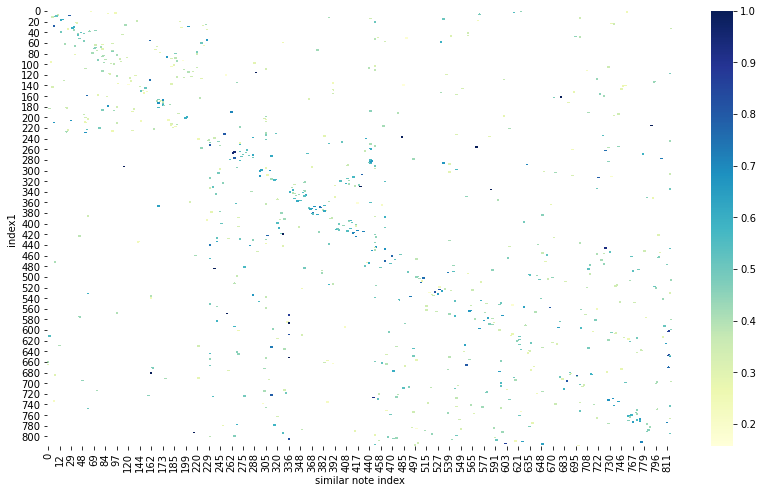

In [104]:
plt.figure(figsize=(14,8))

ax = sns.heatmap(heatdf, cmap="YlGnBu")
plt.show()

In [105]:
print("Mean Cosine Smilarity Score for Count Vectorizer : " , cos_sim_df['Similarity Value'].sum()/ cos_sim_df['Similarity Value'].count())

Mean Cosine Smilarity Score for Count Vectorizer :  0.45649572127139365


In [106]:
tfidf =  TfidfVectorizer()
sparse_matrix1 = tfidf.fit_transform(notedf['notes']) 
doc_term_matrix1 = sparse_matrix1.todense()
dft = pd.DataFrame(doc_term_matrix1, 
                  columns=tfidf.get_feature_names()) 

In [107]:
dj=pd.DataFrame(cosine_similarity(dft, dense_output=True))
dj.head()

,0,1,2,3,4,5,6,7,8,9,...,808,809,810,811,812,813,814,815,816,817
0,1.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.032223,0.038717,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.00000
1,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.00000
2,0.0,0.0,1.000000,0.087574,0.0,0.0,0.0,0.0,0.0,0.0,...,0.077448,0.032234,0.0,0.0,0.01972,0.062183,0.046752,0.0,0.000000,0.04108
3,0.0,0.0,0.087574,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.00000,0.045870,0.000000,0.0,0.000000,0.00000
4,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.075587,0.00000


In [108]:
t=[]

# Part 01:
for j,k in enumerate(dj.values):
    for n in range(len(k)):
        t.append([j,n,k[n]])

# Part 02:
qq=[]
for i in range(len(t)):
    if t[i][0]==t[i][1]:
        qq.append([t[i][0],t[i][1],0])
    else:
        qq.append(t[i])
qq[:5]

[[0, 0, 0], [0, 1, 0.0], [0, 2, 0.0], [0, 3, 0.0], [0, 4, 0.0]]

In [109]:
u=defaultdict(list)

# Part 01:

for i in range(len(qq)):
    u[qq[i][0]].append(qq[i][2])
    
updated_df=pd.DataFrame(u)

# updated_df.max(axis=1)
# max(updated_df[0])
# np.argmax(updated_df[3])
# updated_df[3]

# Part 02:

position_maxVal=[]
for i in range(len(updated_df)):
    position_maxVal.append(np.argmax(updated_df[i]))

In [110]:
sent_comp=[]
sent_index = []

for j in position_maxVal: # list of highest similarity index positions
# this creates in order our tweets w/ highest similiarity by row    
            sent_comp.append(notedf['notes'][j])
            sent_index.append(j)
sent_comp

# tweets based on highest similarity value per row as DF
similar_note =pd.DataFrame(sent_comp,columns=['similar note'])

# similiarity values rounded 4 decimal places finding max value per row
similarity_value_=pd.DataFrame(round(updated_df.max(axis=1),4),
                               columns=['Similarity Value'])

similar_note_ind =pd.DataFrame(sent_index,columns=['similar note index'])

In [111]:
# put everything together
cos_sim_df=pd.concat([notedf['notes'], similar_note_ind, similar_note,similarity_value_],axis=1)
heatdf = pd.concat([ similar_note_ind, similarity_value_],axis=1)
cos_sim_df.head(8)

,notes,similar note index,similar note,Similarity Value
0,mmode mild mitral tricuspid regurgitation,624,procedure performed mitral regurgitation,0.5453
1,color doppler suggestive patent foramen ovale ...,67,exam mri lumbar spine without contrast history...,0.2001
2,echocardiogram multiple view heart great vesse...,23,subjective patient present office today proble...,0.1715
3,description normal lv systolic function,611,procedures normal left ventricular systolic fu...,0.5807
4,study moderate biatrial enlargement,96,findings moderate severe generalized neuronal ...,0.2308
5,cc confusion slurred speech hx primarily obtai...,86,cc difficulty word finding hx yo rhf experienc...,0.1900
6,preoperative diagnoses airway obstruction seco...,573,preoperative diagnosis airway obstruction seco...,0.4203
7,procedure eeg wakefulness demonstrates backgro...,11,impression eeg wakefulness drowsiness sleep sy...,0.3657


In [112]:
print(cos_sim_df['notes'][33])
print('----------------------------End of First Note---------------------------------------------------------')
print(cos_sim_df['similar note'][33])
print('----------------------------End of Most Similar Note---------------------------------------------------------')
print('Similarity Value:',cos_sim_df['Similarity Value'][33])

diagnosis status post brain tumor removal history patient yearold female referred physical therapy following complication related brain tumor removal treatment plan ha discussed patient husband
----------------------------End of First Note---------------------------------------------------------
preoperative diagnosis brain tumor left temporal lobe postoperative diagnosis brain tumor left temporal lobe glioblastoma multiforme operative procedure complication surgery per se
----------------------------End of Most Similar Note---------------------------------------------------------
Similarity Value: 0.3578


In [113]:
heatdf = heatdf.rename_axis('index1').reset_index()

In [114]:
#uniform_data = np.random.rand(10, 12)
heatdf = heatdf.pivot( 'index1', "similar note index", "Similarity Value")
heatdf.head()

similar note index,0,3,4,6,7,8,9,10,11,12,...,801,803,805,806,807,810,811,813,814,815
index1,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


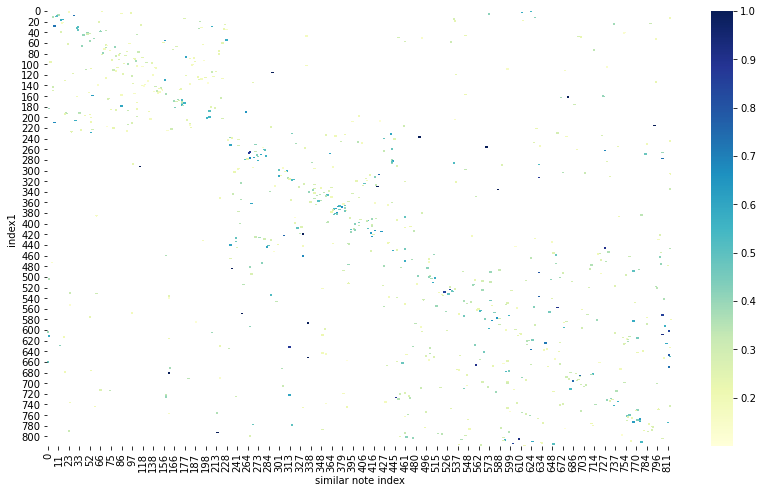

In [115]:
plt.figure(figsize=(14,8))

ax = sns.heatmap(heatdf, cmap="YlGnBu")
plt.show()

In [116]:
print("Mean Cosine Smilarity Score for Count Vectorizer : " , cos_sim_df['Similarity Value'].sum()/ cos_sim_df['Similarity Value'].count())

Mean Cosine Smilarity Score for Count Vectorizer :  0.34903508557457213


In [56]:
cos_sim_df

,notes,similar note index,similar note,Similarity Value
0,mmode mild mitral tricuspid regurgitation,637,procedures severe mitral regurgitation,0.7222
1,color doppler suggestive patent foramen ovale ...,586,gross description right upper lobe wedge biops...,0.7765
2,echocardiogram multiple view heart great vesse...,459,reason exam coronary artery bypass surgery aor...,0.8566
3,description normal lv systolic function,4,study moderate biatrial enlargement,0.7220
4,study moderate biatrial enlargement,723,exam carotid cerebral arteriograms indication ...,0.7381
...,...,...,...,...
813,indication chest pain type test adenosine nucl...,670,exam dobutamine stress test indication chest p...,0.9342
814,chief complaint chest pain history present ill...,795,chief complaint increased work breathing histo...,0.8060
815,history present illness patient yearold woman ...,133,chief complaint falls home history present ill...,0.7537
816,history present illness mr abc yearold gentlem...,633,chief complaint year old female present today ...,0.7912


In [117]:
cardiodf = notedf[notedf['category'] == 'Cardiovascular / Pulmonary']
neurodf = notedf[notedf['category'] == 'Neurology']
gastrodf = notedf[notedf['category'] == 'Gastroenterology']

In [118]:
cardiodf = cardiodf.rename_axis('ori ind').reset_index()
neurodf = neurodf.rename_axis('ori ind').reset_index()
gastrodf = gastrodf.rename_axis('ori ind').reset_index()

In [119]:
tfidf1 =  TfidfVectorizer()
tfidf2 =  TfidfVectorizer()
tfidf3 =  TfidfVectorizer()
sparse_matrix1 = tfidf1.fit_transform(cardiodf['notes']) 
sparse_matrix2 = tfidf2.fit_transform(neurodf['notes']) 
sparse_matrix3 = tfidf3.fit_transform(gastrodf['notes']) 

doc_term_matrix1 = sparse_matrix1.todense()
doc_term_matrix2 = sparse_matrix2.todense()
doc_term_matrix3 = sparse_matrix3.todense()

dft1 = pd.DataFrame(doc_term_matrix1, columns=tfidf1.get_feature_names()) 
dft2 = pd.DataFrame(doc_term_matrix2, columns=tfidf2.get_feature_names()) 
dft3 = pd.DataFrame(doc_term_matrix3, columns=tfidf3.get_feature_names()) 

In [120]:
dj1=pd.DataFrame(cosine_similarity(dft1, dense_output=True))
dj2=pd.DataFrame(cosine_similarity(dft2, dense_output=True))
dj3=pd.DataFrame(cosine_similarity(dft3, dense_output=True))

In [121]:
t1=[]
t2=[]
t3=[]

# Part 01:
for j,k in enumerate(dj1.values):
    for n in range(len(k)):
        t1.append([j,n,k[n]])
for j,k in enumerate(dj2.values):
    for n in range(len(k)):
        t2.append([j,n,k[n]])
for j,k in enumerate(dj3.values):
    for n in range(len(k)):
        t3.append([j,n,k[n]])

# Part 02:
qq1=[]
qq2=[]
qq3=[]

for i in range(len(t1)):
    if t1[i][0]==t1[i][1]:
        qq1.append([t1[i][0],t1[i][1],0])
    else:
        qq1.append(t1[i])
        
for i in range(len(t2)):
    if t2[i][0]==t2[i][1]:
        qq2.append([t2[i][0],t2[i][1],0])
    else:
        qq2.append(t2[i])

for i in range(len(t3)):
    if t3[i][0]==t3[i][1]:
        qq3.append([t3[i][0],t3[i][1],0])
    else:
        qq3.append(t3[i])        
        

In [122]:
u1=defaultdict(list)
u2=defaultdict(list)
u3=defaultdict(list)

# Part 01:
for i in range(len(qq1)):
    u1[qq1[i][0]].append(qq1[i][2])
for i in range(len(qq2)):
    u2[qq2[i][0]].append(qq2[i][2])
for i in range(len(qq3)):
    u3[qq3[i][0]].append(qq3[i][2])
    
updated_df1=pd.DataFrame(u1)
updated_df2=pd.DataFrame(u2)
updated_df3=pd.DataFrame(u3)

# Part 02:

position_maxVal1=[]
position_maxVal2=[]
position_maxVal3=[]
for i in range(len(updated_df1)):
    position_maxVal1.append(np.argmax(updated_df1[i]))
for i in range(len(updated_df2)):
    position_maxVal2.append(np.argmax(updated_df2[i]))
for i in range(len(updated_df3)):
    position_maxVal3.append(np.argmax(updated_df3[i]))

In [123]:
sent_comp1=[]
sent_comp2=[]
sent_comp3=[]

sent_index1 = []
sent_index2 = []
sent_index3 = []

for j in position_maxVal1:      
            sent_comp1.append(cardiodf['notes'][j])
            sent_index1.append(j)
sent_comp1
for j in position_maxVal2:      
            sent_comp2.append(neurodf['notes'][j])
            sent_index2.append(j)
sent_comp2
for j in position_maxVal3:      
            sent_comp3.append(gastrodf['notes'][j])
            sent_index3.append(j)
sent_comp3
 
similar_note1 =pd.DataFrame(sent_comp1,columns=['similar note'])
similar_note2 =pd.DataFrame(sent_comp2,columns=['similar note'])
similar_note3 =pd.DataFrame(sent_comp3,columns=['similar note'])

# similiarity values rounded 4 decimal places finding max value per row
similarity_value1=pd.DataFrame(round(updated_df1.max(axis=1),4),
                               columns=['Similarity Value'])
similarity_value2=pd.DataFrame(round(updated_df2.max(axis=1),4),
                               columns=['Similarity Value'])
similarity_value3=pd.DataFrame(round(updated_df3.max(axis=1),4),
                               columns=['Similarity Value'])

similar_note_ind1 =pd.DataFrame(sent_index1,columns=['similar note index'])
similar_note_ind2 =pd.DataFrame(sent_index2,columns=['similar note index'])
similar_note_ind3 =pd.DataFrame(sent_index3,columns=['similar note index'])

In [124]:
# put everything together
cos_sim_df1=pd.concat([cardiodf['notes'], similar_note_ind1, similar_note1,similarity_value1],axis=1)
cos_sim_df2=pd.concat([neurodf['notes'], similar_note_ind2, similar_note2,similarity_value2],axis=1)
cos_sim_df3=pd.concat([gastrodf['notes'], similar_note_ind3, similar_note3,similarity_value3],axis=1)

heatdf1 = pd.concat([ similar_note_ind1, similarity_value1],axis=1)
heatdf2 = pd.concat([ similar_note_ind2, similarity_value2],axis=1)
heatdf3 = pd.concat([ similar_note_ind3, similarity_value3],axis=1)

In [125]:
heatdf1 = heatdf1.rename_axis('index1').reset_index()
heatdf2 = heatdf2.rename_axis('index1').reset_index()
heatdf3 = heatdf3.rename_axis('index1').reset_index()

In [126]:
heatdf1 = heatdf1.pivot( 'index1', "similar note index", "Similarity Value")
heatdf2 = heatdf2.pivot( 'index1', "similar note index", "Similarity Value")
heatdf3 = heatdf3.pivot( 'index1', "similar note index", "Similarity Value")

# TFIDF - Cardio Vectorization

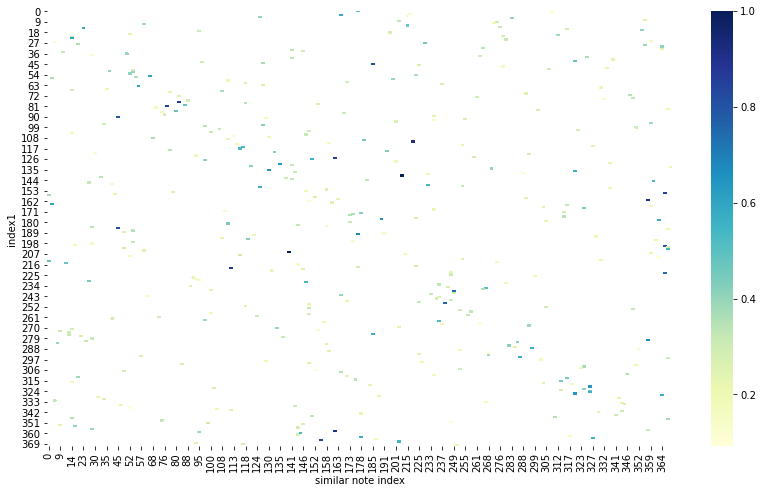

In [127]:
plt.figure(figsize=(14,8))
ax = sns.heatmap(heatdf1, cmap="YlGnBu")
plt.show()

In [128]:
print("Mean Cosine Smilarity Score for Cardio Notes using TFIDF : " , cos_sim_df1['Similarity Value'].sum()/ cos_sim_df1['Similarity Value'].count())

Mean Cosine Smilarity Score for Cardio Notes using TFIDF :  0.3360795148247978


# TFIDF - Neuro Vectorization

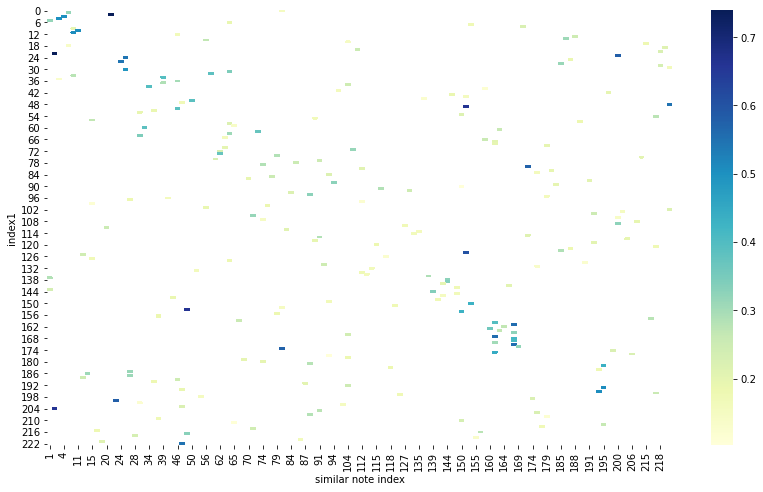

In [129]:
plt.figure(figsize=(14,8))
ax = sns.heatmap(heatdf2, cmap="YlGnBu")
plt.show()

In [130]:
print("Mean Cosine Smilarity Score for Neuro Notes using TFIDF : " , cos_sim_df2['Similarity Value'].sum()/ cos_sim_df2['Similarity Value'].count())

Mean Cosine Smilarity Score for Neuro Notes using TFIDF :  0.2675627802690583


# TFIDF - Gastroenterology Vectorization

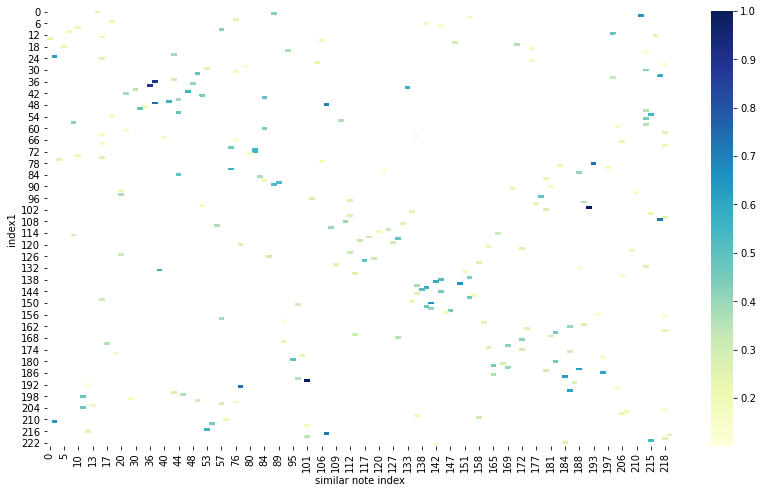

In [131]:
plt.figure(figsize=(14,8))
ax = sns.heatmap(heatdf3, cmap="YlGnBu")
plt.show()


In [132]:
print("Mean Cosine Smilarity Score for Gastroenterology Notes using TFIDF : " , cos_sim_df3['Similarity Value'].sum()/ cos_sim_df3['Similarity Value'].count())

Mean Cosine Smilarity Score for Gastroenterology Notes using TFIDF :  0.34293839285714284


In [133]:
cardiodf = notedf[notedf['category'] == 'Cardiovascular / Pulmonary']
neurodf = notedf[notedf['category'] == 'Neurology']
gastrodf = notedf[notedf['category'] == 'Gastroenterology']


In [134]:
cardiodf = cardiodf.rename_axis('ori ind').reset_index()
neurodf = neurodf.rename_axis('ori ind').reset_index()
gastrodf = gastrodf.rename_axis('ori ind').reset_index()

In [135]:
count_vectorizer1 = CountVectorizer(stop_words='english')
count_vectorizer2 = CountVectorizer(stop_words='english')
count_vectorizer3 = CountVectorizer(stop_words='english')

sparse_matrix1 = count_vectorizer1.fit_transform(cardiodf['notes']) 
sparse_matrix2 = count_vectorizer2.fit_transform(neurodf['notes']) 
sparse_matrix3 = count_vectorizer3.fit_transform(gastrodf['notes']) 

doc_term_matrix1 = sparse_matrix1.todense()
doc_term_matrix2 = sparse_matrix2.todense()
doc_term_matrix3 = sparse_matrix3.todense()

dfc1 = pd.DataFrame(doc_term_matrix1, columns=count_vectorizer1.get_feature_names()) 
dfc2 = pd.DataFrame(doc_term_matrix2, columns=count_vectorizer2.get_feature_names()) 
dfc3 = pd.DataFrame(doc_term_matrix3, columns=count_vectorizer3.get_feature_names()) 

In [136]:
dj1=pd.DataFrame(cosine_similarity(dfc1, dense_output=True))
dj2=pd.DataFrame(cosine_similarity(dfc2, dense_output=True))
dj3=pd.DataFrame(cosine_similarity(dfc3, dense_output=True))

In [137]:
t1=[]
t2=[]
t3=[]

# Part 01:
for j,k in enumerate(dj1.values):
    for n in range(len(k)):
        t1.append([j,n,k[n]])
for j,k in enumerate(dj2.values):
    for n in range(len(k)):
        t2.append([j,n,k[n]])
for j,k in enumerate(dj3.values):
    for n in range(len(k)):
        t3.append([j,n,k[n]])

# Part 02:
qq1=[]
qq2=[]
qq3=[]

for i in range(len(t1)):
    if t1[i][0]==t1[i][1]:
        qq1.append([t1[i][0],t1[i][1],0])
    else:
        qq1.append(t1[i])
        
for i in range(len(t2)):
    if t2[i][0]==t2[i][1]:
        qq2.append([t2[i][0],t2[i][1],0])
    else:
        qq2.append(t2[i])

for i in range(len(t3)):
    if t3[i][0]==t3[i][1]:
        qq3.append([t3[i][0],t3[i][1],0])
    else:
        qq3.append(t3[i])        
        
 

In [138]:
u1=defaultdict(list)
u2=defaultdict(list)
u3=defaultdict(list)

# Part 01:
for i in range(len(qq1)):
    u1[qq1[i][0]].append(qq1[i][2])
for i in range(len(qq2)):
    u2[qq2[i][0]].append(qq2[i][2])
for i in range(len(qq3)):
    u3[qq3[i][0]].append(qq3[i][2])
    
updated_df1=pd.DataFrame(u1)
updated_df2=pd.DataFrame(u2)
updated_df3=pd.DataFrame(u3)

# Part 02:

position_maxVal1=[]
position_maxVal2=[]
position_maxVal3=[]
for i in range(len(updated_df1)):
    position_maxVal1.append(np.argmax(updated_df1[i]))
for i in range(len(updated_df2)):
    position_maxVal2.append(np.argmax(updated_df2[i]))
for i in range(len(updated_df3)):
    position_maxVal3.append(np.argmax(updated_df3[i]))

In [139]:
sent_comp1=[]
sent_comp2=[]
sent_comp3=[]

sent_index1 = []
sent_index2 = []
sent_index3 = []

for j in position_maxVal1:      
            sent_comp1.append(cardiodf['notes'][j])
            sent_index1.append(j)
sent_comp1
for j in position_maxVal2:      
            sent_comp2.append(neurodf['notes'][j])
            sent_index2.append(j)
sent_comp2
for j in position_maxVal3:      
            sent_comp3.append(gastrodf['notes'][j])
            sent_index3.append(j)
sent_comp3
 
similar_note1 =pd.DataFrame(sent_comp1,columns=['similar note'])
similar_note2 =pd.DataFrame(sent_comp2,columns=['similar note'])
similar_note3 =pd.DataFrame(sent_comp3,columns=['similar note'])

# similiarity values rounded 4 decimal places finding max value per row
similarity_value1=pd.DataFrame(round(updated_df1.max(axis=1),4),
                               columns=['Similarity Value'])
similarity_value2=pd.DataFrame(round(updated_df2.max(axis=1),4),
                               columns=['Similarity Value'])
similarity_value3=pd.DataFrame(round(updated_df3.max(axis=1),4),
                               columns=['Similarity Value'])

similar_note_ind1 =pd.DataFrame(sent_index1,columns=['similar note index'])
similar_note_ind2 =pd.DataFrame(sent_index2,columns=['similar note index'])
similar_note_ind3 =pd.DataFrame(sent_index3,columns=['similar note index'])

In [140]:
# put everything together
cos_sim_df1=pd.concat([cardiodf['notes'], similar_note_ind1, similar_note1,similarity_value1],axis=1)
cos_sim_df2=pd.concat([neurodf['notes'], similar_note_ind2, similar_note2,similarity_value2],axis=1)
cos_sim_df3=pd.concat([gastrodf['notes'], similar_note_ind3, similar_note3,similarity_value3],axis=1)

heatdf1 = pd.concat([ similar_note_ind1, similarity_value1],axis=1)
heatdf2 = pd.concat([ similar_note_ind2, similarity_value2],axis=1)
heatdf3 = pd.concat([ similar_note_ind3, similarity_value3],axis=1)

In [141]:
heatdf1 = heatdf1.rename_axis('index1').reset_index()
heatdf2 = heatdf2.rename_axis('index1').reset_index()
heatdf3 = heatdf3.rename_axis('index1').reset_index()

In [142]:
heatdf1 = heatdf1.pivot( 'index1', "similar note index", "Similarity Value")
heatdf2 = heatdf2.pivot( 'index1', "similar note index", "Similarity Value")
heatdf3 = heatdf3.pivot( 'index1', "similar note index", "Similarity Value")

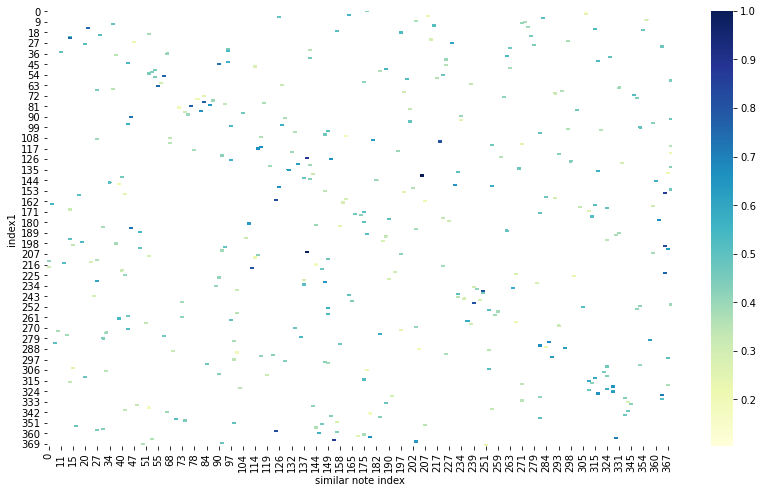

In [143]:
plt.figure(figsize=(14,8))
ax = sns.heatmap(heatdf1, cmap="YlGnBu")
plt.show()

In [145]:

print("Mean Cosine Smilarity Score for Cardio Notes using Count Vectorizer : " , cos_sim_df1['Similarity Value'].sum()/ cos_sim_df1['Similarity Value'].count())

Mean Cosine Smilarity Score for Cardio Notes using Count Vectorizer :  0.4464140161725068


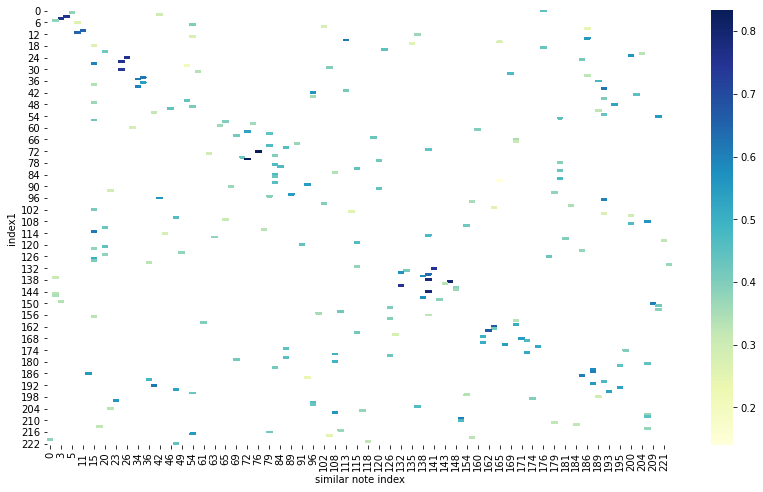

In [237]:
plt.figure(figsize=(14,8))
ax = sns.heatmap(heatdf2, cmap="YlGnBu")
plt.show()

In [146]:
print("Mean Cosine Smilarity Score for Neuro Notes using Count Vectorizer : " , cos_sim_df2['Similarity Value'].sum()/ cos_sim_df2['Similarity Value'].count())

Mean Cosine Smilarity Score for Neuro Notes using Count Vectorizer :  0.3822856502242152


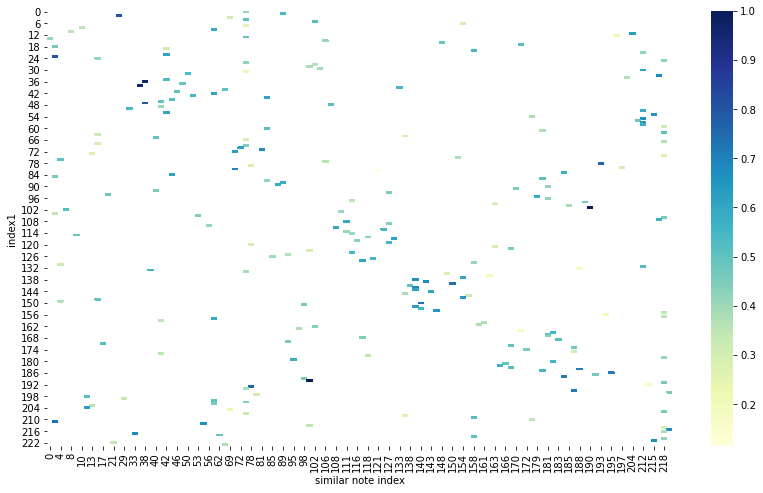

In [147]:
plt.figure(figsize=(14,8))
ax = sns.heatmap(heatdf3, cmap="YlGnBu")
plt.show()


In [148]:
print("Mean Cosine Smilarity Score for TSN Notes using Count Vectorizer : " , cos_sim_df3['Similarity Value'].sum()/ cos_sim_df3['Similarity Value'].count())

Mean Cosine Smilarity Score for Gastroenterology Notes using Count Vectorizer :  0.482534375


In [149]:
sentence_embedded.shape

(818, 768)

In [150]:
sentence_embedded

array([[-1.2876999e+00, -6.9299465e-01,  4.7664225e-02, ...,
         5.9169400e-01, -7.9668802e-01,  2.2564097e-01],
       [-5.5367672e-01, -3.1080056e-02,  7.0073225e-02, ...,
         1.9375648e-01, -3.6212498e-01, -3.2601896e-01],
       [-8.3171505e-01, -1.0795377e+00, -3.6168748e-01, ...,
         6.6759425e-01, -4.9892178e-01,  6.1629432e-01],
       ...,
       [-1.2557582e+00,  2.5509330e-02, -2.4371371e-01, ...,
        -1.8376057e-01, -3.7765342e-01, -1.3005817e-03],
       [-1.8800427e+00, -5.3842589e-02, -2.5483122e-01, ...,
        -4.1815132e-02, -1.7152891e-01, -6.2976956e-01],
       [-1.1461257e+00, -6.2845778e-01, -8.8417083e-01, ...,
        -3.7298515e-01, -2.0612633e-01,  6.7612302e-01]], dtype=float32)

In [151]:
dfq = pd.DataFrame(sentence_embedded)

In [152]:
dfq.shape

(818, 768)

In [153]:
 dj=pd.DataFrame(cosine_similarity(dfq, dense_output=True))
dj.head()

,0,1,2,3,4,5,6,7,8,9,...,808,809,810,811,812,813,814,815,816,817
0,1.000000,0.616858,0.474713,0.519563,0.566479,0.363106,0.444563,0.427924,0.362263,0.372021,...,0.458065,0.542149,0.441465,0.480680,0.563215,0.520226,0.471011,0.433782,0.443912,0.515689
1,0.616858,1.000000,0.641631,0.574824,0.641854,0.533853,0.650072,0.566072,0.448579,0.470236,...,0.650168,0.599944,0.548943,0.513483,0.652440,0.609378,0.636358,0.480205,0.596562,0.606532
2,0.474713,0.641631,1.000000,0.631130,0.617562,0.456765,0.604210,0.548612,0.364655,0.492554,...,0.781502,0.752348,0.503399,0.449958,0.680158,0.795155,0.593124,0.402144,0.556980,0.629844
3,0.519563,0.574824,0.631130,1.000000,0.722045,0.453894,0.475930,0.623470,0.517197,0.567566,...,0.614739,0.639257,0.570880,0.522095,0.582792,0.604988,0.566482,0.518492,0.557368,0.672167
4,0.566479,0.641854,0.617562,0.722045,1.000000,0.489379,0.506691,0.583258,0.508150,0.497549,...,0.575337,0.597796,0.633173,0.586520,0.607764,0.615692,0.538130,0.511841,0.628504,0.667460


In [154]:
t=[]

# Part 01:
for j,k in enumerate(dj.values):
    for n in range(len(k)):
        t.append([j,n,k[n]])

# Part 02:
qq=[]
for i in range(len(t)):
    if t[i][0]==t[i][1]:
        qq.append([t[i][0],t[i][1],0])
    else:
        qq.append(t[i])
qq[:5]

[[0, 0, 0],
 [0, 1, 0.6168579],
 [0, 2, 0.4747126],
 [0, 3, 0.51956344],
 [0, 4, 0.5664793]]

In [155]:
u=defaultdict(list)

# Part 01:

for i in range(len(qq)):
    u[qq[i][0]].append(qq[i][2])
    
updated_df=pd.DataFrame(u)

# updated_df.max(axis=1)
# max(updated_df[0])
# np.argmax(updated_df[3])
# updated_df[3]

# Part 02:

position_maxVal=[]
for i in range(len(updated_df)):
    position_maxVal.append(np.argmax(updated_df[i]))

In [156]:
sent_comp=[]
sent_index = []

for j in position_maxVal: # list of highest similarity index positions
# this creates in order our tweets w/ highest similiarity by row    
            sent_comp.append(notedf['notes'][j])
            sent_index.append(j)
sent_comp

# tweets based on highest similarity value per row as DF
similar_note =pd.DataFrame(sent_comp,columns=['similar note'])

# similiarity values rounded 4 decimal places finding max value per row
similarity_value_=pd.DataFrame(round(updated_df.max(axis=1),4),
                               columns=['Similarity Value'])

similar_note_ind =pd.DataFrame(sent_index,columns=['similar note index'])

In [157]:
cos_sim_df=pd.concat([notedf['notes'], similar_note_ind, similar_note,similarity_value_],axis=1)
heatdf = pd.concat([ similar_note_ind, similarity_value_],axis=1)
cos_sim_df.head(8)

,notes,similar note index,similar note,Similarity Value
0,mmode mild mitral tricuspid regurgitation,637,procedures severe mitral regurgitation,0.7222
1,color doppler suggestive patent foramen ovale ...,586,gross description right upper lobe wedge biops...,0.7765
2,echocardiogram multiple view heart great vesse...,459,reason exam coronary artery bypass surgery aor...,0.8566
3,description normal lv systolic function,4,study moderate biatrial enlargement,0.7220
4,study moderate biatrial enlargement,723,exam carotid cerebral arteriograms indication ...,0.7381
5,cc confusion slurred speech hx primarily obtai...,182,cc progressive unsteadiness following head tra...,0.8433
6,preoperative diagnoses airway obstruction seco...,597,preoperative diagnosis subglottic upper trache...,0.8740
7,procedure eeg wakefulness demonstrates backgro...,11,impression eeg wakefulness drowsiness sleep sy...,0.8707


In [158]:
heatdf = heatdf.rename_axis('index1').reset_index()

In [159]:
#uniform_data = np.random.rand(10, 12)
heatdf = heatdf.pivot( 'index1', "similar note index", "Similarity Value")
heatdf.head()

similar note index,1,4,5,6,7,8,11,13,16,17,...,799,800,801,805,806,809,810,811,813,817
index1,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


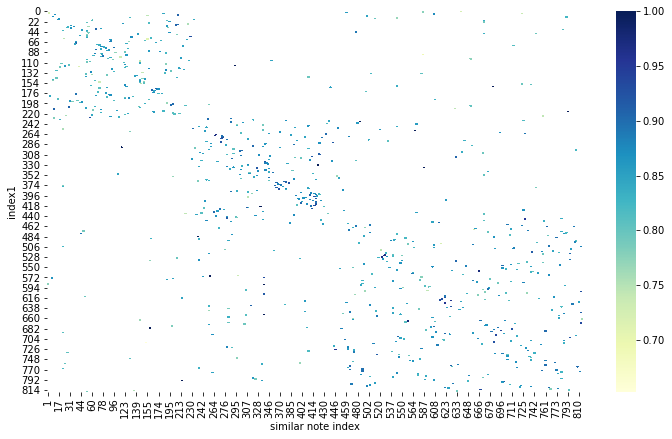

In [162]:
plt.figure(figsize=(12,7))
ax = sns.heatmap(heatdf, cmap="YlGnBu")
plt.show()


In [163]:
print("Mean Cosine Smilarity Score for Bert Model : " , cos_sim_df['Similarity Value'].sum()/ cos_sim_df['Similarity Value'].count())

Mean Cosine Smilarity Score for Bert Model :  0.8481940097799511


# Cosine Similarity Score comparision for Clinical Terms

In [164]:
nlp = spacy.load('en_ner_bionlp13cg_md')
score1 = []
for i in termdf['Term1']:
    vec1 = nlp(i)
    score1.append(vec1)
score2 = []
for j in termdf['Term2']:
    vec2 = nlp(j)
    score2.append(vec2)
total = 0
for i in range(0, len(score1)):
    value = score1[i].similarity(score2[i])
    print(value)
    total = total + value
print('Total Similarity Score :', total)

0.29974553301635265
0.5489524478725705
0.039418093121308305
0.1737621710623982
0.4682921932575109
0.8206373811832466
0.20310363904716594
0.22234816605189475
0.17673563454052477
0.31668550728739614
0.07532849990212051
0.16212278176971426
0.34199377842963374
0.04081713209989454
0.6158297312220589
0.6193217993120024
0.2524883738185359
0.2845161823840789
0.4001476016676121
0.369732040917966
0.06487878865976429
0.16762948892521692
0.8508959417253167
0.2323282682201813
0.27779266267041897
0.2171053138703628
0.42423866655307785
0.3858253756787614
0.21862109123891058
0.054104118969750314
0.12779483785106066
0.18114571078554348
0.1272836060721158
0.42138138562708727
0.045295775061417756
0.6179179813803065
0.0909188389268272
0.6078905444340721
0.2854261215233804
0.6698975929410176
0.2919788543833673
0.0
0.8026033995384052
-0.029238640181842877
0.15699689818568016
0.053821179139345525
0.2680416532271102
0.38622310119316017
0.053821179139345525
0.1919070783888689
0.30738252768443036
0.263417721787

<ipython-input-164-d5ff69b9d756>:12: UserWarning:

[W008] Evaluating Doc.similarity based on empty vectors.



In [168]:
nlp1 = spacy.load('en_ner_bc5cdr_md')
score1 = []
for i in termdf['Term1']:
    vec1 = nlp1(i)
    score1.append(vec1)
score2 = []
for j in termdf['Term2']:
    vec2 = nlp1(j)
    score2.append(vec2)
total1 = 0
for i in range(0, len(score1)):
    value = score1[i].similarity(score2[i])
    print(value)
    total1 = total1 + value
print('Total Similarity Score :', total1)

0.29974553301635265
0.5489524478725705
0.039418093121308305
0.1737621710623982
0.4682921932575109
0.8206373811832466
0.20310363904716594
0.22234816605189475
0.17673563454052477
0.31668550728739614
0.07532849990212051
0.16212278176971426
0.34199377842963374
0.04081713209989454
0.6158297312220589
0.6193217993120024
0.2524883738185359
0.2845161823840789
0.4001476016676121
0.369732040917966
0.06487878865976429
0.16762948892521692
0.8508959417253167
0.2323282682201813
0.27779266267041897
0.2171053138703628
0.42423866655307785
0.3858253756787614
0.21862109123891058
0.054104118969750314
0.12779483785106066
0.18114571078554348
0.1272836060721158
0.42138138562708727
0.045295775061417756
0.6179179813803065
0.0909188389268272
0.6078905444340721
0.2854261215233804
0.6698975929410176
0.2919788543833673
0.0
0.8026033995384052
-0.029238640181842877
0.15699689818568016
0.053821179139345525
0.2680416532271102
0.38622310119316017
0.053821179139345525
0.1919070783888689
0.30738252768443036
0.263417721787

<ipython-input-168-155e9a3105fc>:12: UserWarning:

[W008] Evaluating Doc.similarity based on empty vectors.



In [169]:
print("Mean Cosine Similarity Scores for Clinical Terms using en_ner_bionlp13cg_md :"  , total/len(score1))
print("Mean Cosine Similarity Scores for Clinical Terms using en_ner_bc5cdr_md :"  , total1/len(score1))

Mean Cosine Similarity Scores for Clinical Terms using en_ner_bionlp13cg_md : 0.2647063689914626
Mean Cosine Similarity Scores for Clinical Terms using en_ner_bc5cdr_md : 0.2647063689914626


In [170]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-large-uncased', do_lower_case=True)

In [171]:
def bert_encode(data,maximum_length) :
    input_ids = []
    attention_masks = []
  

    for i in range(len(data)):
        encoded = tokenizer.encode_plus(
        
          data[i],
          add_special_tokens=True,
          max_length=maximum_length,
          pad_to_max_length=True,
        
          return_attention_mask=True,
        
        )
      
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])
    return np.array(input_ids),np.array(attention_masks)

In [177]:
notes_input_id1,notes_attention_mask1 = bert_encode(termdf['Term1'],600)

In [178]:
notes_input_id2,notes_attention_mask2 = bert_encode(termdf['Term2'],600)

In [182]:
sim = []
berttotal = 0
for i in range(0, len(notes_input_id1)):
    result = 1 - spatial.distance.cosine(notes_input_id1[i], notes_input_id2[i])
    sim.append(result)
    berttotal = berttotal + result

In [183]:
print("Mean Cosine Similarity Scores for Clinical Terms from Bert Encoding :"  , berttotal/len(notes_input_id1))

Mean Cosine Similarity Scores for Clinical Terms from Bert Encoding : 0.6279025182866753


# Word Embedding  using Supervised Learning Method

### Data Preparation

In [63]:
Y = pd.get_dummies(notedf['category']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (818, 3)


In [34]:
xtrain, xvalid, ytrain, yvalid = train_test_split(notedf.notes, Y, 
                                                  stratify=notedf.target, 
                                                  random_state=42, 
                                                  test_size=0.3, shuffle=True)

In [35]:
# using keras tokenizer here
token = text.Tokenizer(num_words=None)
max_len = 1500

token.fit_on_texts(list(xtrain) + list(xvalid))
xtrain_seq = token.texts_to_sequences(xtrain)
xvalid_seq = token.texts_to_sequences(xvalid)

#zero pad the sequences
xtrain_pad = sequence.pad_sequences(xtrain_seq, maxlen=max_len)
xvalid_pad = sequence.pad_sequences(xvalid_seq, maxlen=max_len)

word_index = token.word_index

# A LSTM without any pretrained embeddings and one dense layer

In [19]:
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                 50,
                 input_length=max_len))
model.add(LSTM(50, dropout=0.25,))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])   
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1500, 50)          197600    
_________________________________________________________________
lstm (LSTM)                  (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 3)                 153       
Total params: 217,953
Trainable params: 217,953
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(xtrain_pad, ytrain, epochs=3, batch_size=12)  

Epoch 1/3
48/48 [==============================] - 85s 2s/step - loss: 1.0678 - accuracy: 0.4510
Epoch 2/3
48/48 [==============================] - 77s 2s/step - loss: 0.9060 - accuracy: 0.5472
Epoch 3/3
48/48 [==============================] - 77s 2s/step - loss: 0.6086 - accuracy: 0.7762


In [21]:
accr = model.evaluate(xtrain_pad,ytrain)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

18/18 [==============================] - 4s 192ms/step - loss: 0.3909 - accuracy: 0.8724
Test set
  Loss: 0.391
  Accuracy: 0.872


In [22]:
accrt = model.evaluate(xvalid_pad,yvalid)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accrt[0],accrt[1]))

8/8 [==============================] - 2s 190ms/step - loss: 0.7996 - accuracy: 0.6423
Test set
  Loss: 0.800
  Accuracy: 0.642


# Loading GLOVE Pretrained Model

In [24]:
embeddings_index = {}
f = open('glove.840B.300d.txt','r',encoding='utf-8')
for line in tqdm(f):
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray([float(val) for val in values[1:]])
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

2196018it [05:59, 6101.21it/s]

Found 2196017 word vectors.


In [41]:
# create an embedding matrix for the words we have in the dataset
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

100%|████████████████████████████████████████████████████████████████████████████| 3951/3951 [00:00<00:00, 4363.22it/s]


## A LSTM with GLOVE Pretrained Embeddings and one dense layer

In [43]:
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                 300,
                 weights=[embedding_matrix],
                 input_length=max_len,
                 trainable=False))

model.add(LSTM(50, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 1500, 300)         1185600   
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                70200     
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 153       
Total params: 1,255,953
Trainable params: 70,353
Non-trainable params: 1,185,600
_________________________________________________________________


In [44]:
model.fit(xtrain_pad, ytrain,  epochs=3, batch_size=64)

Epoch 1/3
9/9 [==============================] - 149s 16s/step - loss: 1.0465 - accuracy: 0.4615
Epoch 2/3
9/9 [==============================] - 141s 16s/step - loss: 0.9188 - accuracy: 0.5892
Epoch 3/3
9/9 [==============================] - 141s 16s/step - loss: 0.7652 - accuracy: 0.7238


In [45]:
accr = model.evaluate(xtrain_pad,ytrain)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

18/18 [==============================] - 29s 1s/step - loss: 0.6223 - accuracy: 0.7762
Test set
  Loss: 0.622
  Accuracy: 0.776


In [46]:
accrt = model.evaluate(xvalid_pad,yvalid)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accrt[0],accrt[1]))

8/8 [==============================] - 12s 1s/step - loss: 0.8021 - accuracy: 0.6098
Test set
  Loss: 0.802
  Accuracy: 0.610


## GRU with GLOVE Pretrained Embeddings and one dense layer

In [47]:
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                 300,
                 weights=[embedding_matrix],
                 input_length=max_len,
                 trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(GRU(300))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
    
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 1500, 300)         1185600   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 1500, 300)         0         
_________________________________________________________________
gru (GRU)                    (None, 300)               540900    
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 903       
Total params: 1,727,403
Trainable params: 541,803
Non-trainable params: 1,185,600
_________________________________________________________________


In [48]:
model.fit(xtrain_pad, ytrain,  epochs=3, batch_size=64)

Epoch 1/3
9/9 [==============================] - 756s 85s/step - loss: 1.0242 - accuracy: 0.4580
Epoch 2/3
9/9 [==============================] - 1160s 131s/step - loss: 0.7671 - accuracy: 0.6678
Epoch 3/3
9/9 [==============================] - 1274s 142s/step - loss: 0.5662 - accuracy: 0.7745


In [49]:
accr = model.evaluate(xtrain_pad,ytrain)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

18/18 [==============================] - 417s 23s/step - loss: 0.4003 - accuracy: 0.8357
Test set
  Loss: 0.400
  Accuracy: 0.836


In [50]:
accrt = model.evaluate(xvalid_pad,yvalid)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accrt[0],accrt[1]))

8/8 [==============================] - 191s 24s/step - loss: 0.7045 - accuracy: 0.6951
Test set
  Loss: 0.705
  Accuracy: 0.695
